# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel. 

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


--- 
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [1]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv') #completa el código
usage = pd.read_csv('/datasets/usage.csv') #completa el código

In [3]:
plans.head(5) # mostrar las primeras 5 filas de plans

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [4]:
users.head(5) # mostrar las primeras 5 filas de users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [5]:
usage.head(5) # mostrar las primeras 5 filas de usage

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [6]:
# revisar el número de filas y columnas de cada dataset
plans.shape
plans.info()

users.shape  
users.info()

usage.shape
usage.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 2 entries, 0 to 1
,Data columns (total 8 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   plan_name          2 non-null      object 
, 1   messages_included  2 non-null      int64  
, 2   gb_per_month       2 non-null      int64  
, 3   minutes_included   2 non-null      int64  
, 4   usd_monthly_pay    2 non-null      int64  
, 5   usd_per_gb         2 non-null      float64
, 6   usd_per_message    2 non-null      float64
, 7   usd_per_minute     2 non-null      float64
,dtypes: float64(3), int64(4), object(1)
,memory usage: 256.0+ bytes
,<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4000 entries, 0 to 3999
,Data columns (total 8 columns):
, #   Column      Non-Null Count  Dtype 
,---  ------      --------------  ----- 
, 0   user_id     4000 non-null   int64 
, 1   first_name  4000 non-null   object
, 2   last_name   4000 non-null   object
, 3   age         4000 no

In [7]:
plans.info() # inspección de plans con .info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 2 entries, 0 to 1
,Data columns (total 8 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   plan_name          2 non-null      object 
, 1   messages_included  2 non-null      int64  
, 2   gb_per_month       2 non-null      int64  
, 3   minutes_included   2 non-null      int64  
, 4   usd_monthly_pay    2 non-null      int64  
, 5   usd_per_gb         2 non-null      float64
, 6   usd_per_message    2 non-null      float64
, 7   usd_per_minute     2 non-null      float64
,dtypes: float64(3), int64(4), object(1)
,memory usage: 256.0+ bytes


In [8]:
users.info() # inspección de users con .info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4000 entries, 0 to 3999
,Data columns (total 8 columns):
, #   Column      Non-Null Count  Dtype 
,---  ------      --------------  ----- 
, 0   user_id     4000 non-null   int64 
, 1   first_name  4000 non-null   object
, 2   last_name   4000 non-null   object
, 3   age         4000 non-null   int64 
, 4   city        3531 non-null   object
, 5   reg_date    4000 non-null   object
, 6   plan        4000 non-null   object
, 7   churn_date  466 non-null    object
,dtypes: int64(2), object(6)
,memory usage: 250.1+ KB


In [9]:
usage.info() # inspección de usage con .info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 40000 entries, 0 to 39999
,Data columns (total 6 columns):
, #   Column    Non-Null Count  Dtype  
,---  ------    --------------  -----  
, 0   id        40000 non-null  int64  
, 1   user_id   40000 non-null  int64  
, 2   type      40000 non-null  object 
, 3   date      39950 non-null  object 
, 4   duration  17924 non-null  float64
, 5   length    22104 non-null  float64
,dtypes: float64(2), int64(2), object(2)
,memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [10]:
# cantidad de nulos para users
users.isna().sum() # Cantidad de valores nulos)
users.isna().mean() # Proporción de valores nulos)

user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64

In [11]:
# cantidad de nulos para usage
usage.isna().sum()
usage.isna().mean()

id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).
* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos. 
 
 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción? En users: churn_date: (88.35%), city (11.72%). En users: date (0.12%), duration (55.19%) y en length (44.74%).
- Indica qué harías: ¿imputar, eliminar, ignorar? en las columnas de City (imputaria), en la de churn_date (ignoraria), date (eliminaria) y en duration y length (depende de la situación que sea el contexto, pero se ignoraria dependiendo de la situacion de cada una).

### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [12]:
users.isna().sum()# explorar columnas numéricas de users

user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

- La columna `user_id` se ve que el numero de users_id es 0 es decir que no hay valores atipicos o nulos.
- La columna `age` misma relación con age, no hay valores atipicos o nulos.

In [13]:
usage.isna().sum()
 # explorar columnas numéricas de usage

id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64

- Las columnas `id` y `user_id` no muestran nulos.
- Las columnas 'type' igual no muestran nulos, pero las columnas de date, length y duration muestran varios nulos.

In [14]:
# explorar columnas categóricas de users
columnas_user = ['city', 'plan']
for col in columnas_user:
    print(f"--- Explorando: {col} ---")
    print(f"Valores únicos ({users[col].nunique()}):")
    print(users[col].value_counts(dropna=False))
    print("\n")

--- Explorando: city ---
,Valores únicos (7):
,Bogotá      808
,CDMX        730
,Medellín    616
,NaN         469
,GDL         450
,Cali        424
,MTY         407
,?            96
,Name: city, dtype: int64
,
,
,--- Explorando: plan ---
,Valores únicos (2):
,Basico     2595
,Premium    1405
,Name: plan, dtype: int64
,
,


- La columna `city` Muestra 7 valores únicos, siendo diferentes ciudades, recalcando un valor atípico marcado con '?', dando 96 datos nulos.

- La columna `plan` Muestra dos valores únicos, siendo los tipos de planes.

In [15]:
# explorar columna categórica de usage
usage['type'].value_counts() # completa el código

text    22092
call    17908
Name: type, dtype: int64

- La columna `type` En la columna type se muestran los tipos de comunicación, en este caso por texto como por llamada.

---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso. 

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?
  Valores nulos: date, churn date y city.
  Valores inválidos: city
- ¿Qué acción tomarías?
  Reemplazar los '?' de city por NaN, imputar como desconocido o nulo dependiendo del análisis
  Eliminar los registros de fecha nula, churn_date no imputaría, trataría los nulos como usuarios activos, en Duration y length no imputaría ni eliminaría, trataría los nulos como NA semánticos dependiendo del tipo.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [16]:

# Convertir a fecha la columna `reg_date` de users
users['reg_date'] = pd.to_datetime(users['reg_date']) # completa el código


In [17]:

# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date']) # completa el código


In [18]:
# Revisar los años presentes en `reg_date` de users
years = users['reg_date'].dt.year.unique()
"Años presentes:", sorted(years)

('Años presentes:', [2022, 2023, 2024, 2026])

En `reg_date`, muestra los años de la base de datos que van desde el 2022 hasta el actual 2026, tomando solo el año de la fecha completa.

In [19]:
# Revisar los años presentes en `date` de usage
years = usage['date'].dt.year.unique()
"Años presentes:", sorted(years)

('Años presentes:', [2024.0, nan])

En 'date', se pueden observar valores NaN después del 2024

✍️ 
**Comentario**: Escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (Aparece el año 2026 siendo un año imposible dado a que esta apenas empezando el año). No aparecen años imposibles, pero sí aparecen valores nulos en usage y la fecha 2025 en users.
- ¿Qué harías con ellas? 
Eliminar los NaN, ya que son valores nulos y no pueden ser utilizados en el análisis temporal.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [20]:
# Reemplazar -999 por la mediana de age

age_mediana = users.loc[users['age'] != -999, 'age'].median()
users['age'] = users['age'].replace(-999, age_mediana)
# Verificar cambios
users['age'].describe()


count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [21]:
# Reemplazar ? por NA en city
import numpy as np
users['city'] = users['city'].replace('?', np.nan)
# Verificar cambios
users['city'].describe()

count       3435
unique         6
top       Bogotá
freq         808
Name: city, dtype: object

In [22]:
# Marcar fechas futuras como NA para reg_date
fecha_actual = pd.Timestamp.now()
users.loc[users['reg_date'] > fecha_actual, 'reg_date'] = pd.NaT
# Verificar cambios
users['reg_date'].describe()


count                              3960
unique                             3960
top       2024-06-27 06:08:22.325581392
freq                                  1
first               2022-01-01 00:00:00
last                2024-12-31 00:00:00
Name: reg_date, dtype: object

### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [23]:
# Verificación MAR en usage (Missing At Random) para duration
usage["duration"].isna().groupby(usage["type"]).mean().sort_values(ascending=False).head(10)

type
text    0.999276
call    0.000000
Name: duration, dtype: float64

In [24]:
# Verificación MAR en usage (Missing At Random) para length
usage["length"].isna().groupby(usage["type"]).mean().sort_values(ascending=False).head(10)

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquí y escribe que tu diagnostico de nulos en `duration` y `length`}
Los valores nulos en duration son de texto, el cual es correcto ya que se mide la duracion de la llamada no de los textos(no se mide por duración)
Los valores nulos de Length son correctos ya que se mide la cantidad de textos, mas no su duracion de la llamada.

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico. 

**Instrucciones:**: 
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [25]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int) #conocer el total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int) #conocer el total de llamadas


# Agrupar información por usuario
usage_agg = usage.groupby('user_id').agg({
    'is_text': 'sum',
    'is_call': 'sum',
    'duration': 'sum'
}).reset_index()

# observar resultado
usage_agg.head(3)


,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [26]:

# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "duration": "cant_minutos_llamada"
})

# observar resultado
usage_agg.head(3)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [27]:

# Combinar la tabla agregada con el dataset de usuarios
user_profile = usage_agg.merge(users, on='user_id', how='inner')
user_profile.head(5)


,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,5,10,33.18,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [28]:
# Resumen estadístico de las columnas numéricas
user_profile.describe()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,age
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,11999.729432,5.524381,4.478120,23.317054,48.138285
std,1154.898108,2.358416,2.144238,18.168095,17.691541
min,10000.000000,0.000000,0.000000,0.000000,18.000000
25%,10999.500000,4.000000,3.000000,11.120000,33.000000
50%,12000.000000,5.000000,4.000000,19.780000,48.000000
75%,12999.500000,7.000000,6.000000,31.415000,63.000000
max,13999.000000,17.000000,15.000000,155.690000,79.000000


In [29]:

# Distribución porcentual del tipo de plan
plan_distribution = user_profile['plan'].value_counts(normalize=True) * 100
plan_distribution.round(2)

Basico     64.87
Premium    35.13
Name: plan, dtype: float64

---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada` 

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda) 

**Hint**  
Para cada histograma, 
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

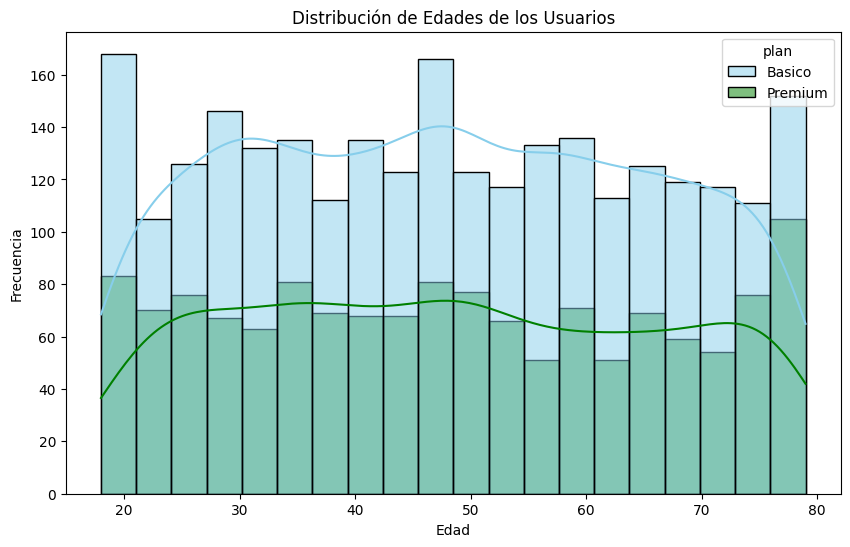

In [30]:

# Histograma para visualizar la edad (age)
plt.figure(figsize=(10, 6))
sns.histplot(data=user_profile,
             x='age',
             bins=20,
             kde=True,
             hue='plan',
             palette=['skyblue','green'])
plt.title('Distribución de Edades de los Usuarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


💡Insights: 
- La edad tiene una distribución ampliamente distribuida, la cual sugiere que ConnectaTel no depende únicamente de un solo sector demográfico.
- El plan básico domina en todas las edades, siendo mayor que los usuarios del plan premium, siendo una oportunidad de ampliar al plan premium.
- El segmento de 30 a 35 años representa el núcleo de clientes activos y de estabilidad económica a los que podría ser viable dar ofertas de valor agregado.
- El plan premium no se puede manejar como un producto exclusivo de jóvenes, se puede ampliar a segmentos de mayor edad.

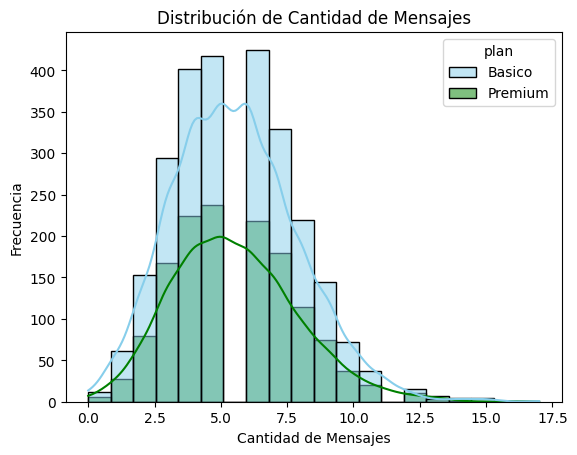

In [31]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile,
             x='cant_mensajes',
             bins=20,
             kde=True,
             hue='plan',
             palette=['skyblue','green'])
plt.title('Distribución de Cantidad de Mensajes')
plt.xlabel('Cantidad de Mensajes')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- Entre los planes básico y premium no hay un diferenciador fuerte, teniendo un pico principal entre 4 y 6 mensajes, se debe a que los usuarios envían entre 3 y 8 mensajes.
- Tiene una distribución ligeramente sesgada a la derecha, ya que hay una cola que va de los 15 a 17 mensajes, teniendo una oportunidad para crear planes con beneficios en SMS ilimitados.
- El plan básico tiene mayor presencia en todos los rangos, debido a que hay más usuarios en este plan.
- El plan premium no es adquirido por uso elevado de SMS, pudiendo ser por minutos de llamadas, beneficios extras o datos móviles.

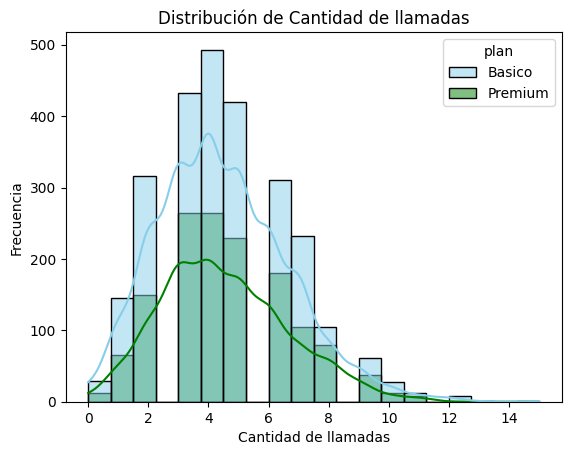

In [32]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, 
             x='cant_llamadas',
             bins=20,
             kde=True,
             hue='plan',
             palette=['skyblue','green'])
plt.title('Distribución de Cantidad de llamadas')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- El comportamiento promedio que muestran en ambos planes ronda entre 3 y 5 llamadas.
- Existe una cola de 12 a 15 llamadas, a la cual se le llama "heavy callers".
- Se generó una diferencia entre mensajes y llamadas, la cual podría estar asociada al plan premium, siendo que las personas con mayor volumen de llamadas encuentren valioso el plan premium.
- Aunque el plan básico domina en frecuencia total, debe tomarse en cuenta que no necesariamente significa mayor intensidad promedio.

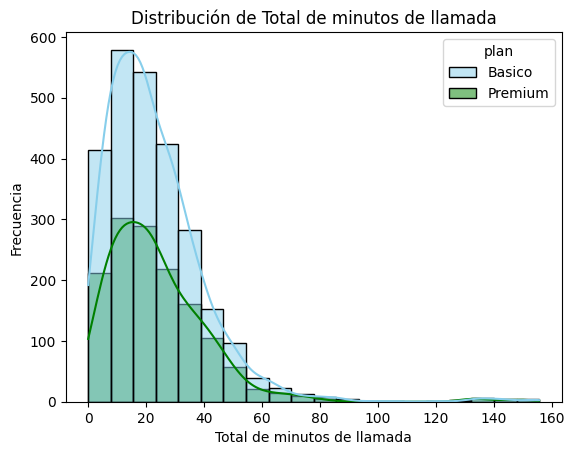

In [33]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile,
             x='cant_minutos_llamada',
             bins=20,
             kde=True,
             hue='plan',
             palette=['skyblue','green'])
plt.title('Distribución de Total de minutos de llamada')
plt.xlabel('Total de minutos de llamada')
plt.ylabel('Frecuencia')
plt.show()

💡Insights: 
- El mercado que nos muestra está compuesto por consumidores de bajo y medio uso y una muy pequeña parte de consumidores heavy users.
- El consumo de minutos en premium de 40 o más minutos está presente, es decir, los que están en plan premium son los que hablan por más tiempo.
- Se observa un segmento con valores extremos por arriba de los 100 minutos, es posible que se trate de un segmento corporativo o de uso intenso, lo cual es oportunidad para dar planes especializados o tarifas diferenciadas.
- El plan básico tiene mayor frecuencia en el ámbito general, pero el plan premium parece tener mayor concentración en los consumos medio-alto. La transición de básico a premium se puede deber al aumento progresivo en minutos de llamada.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age` 
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

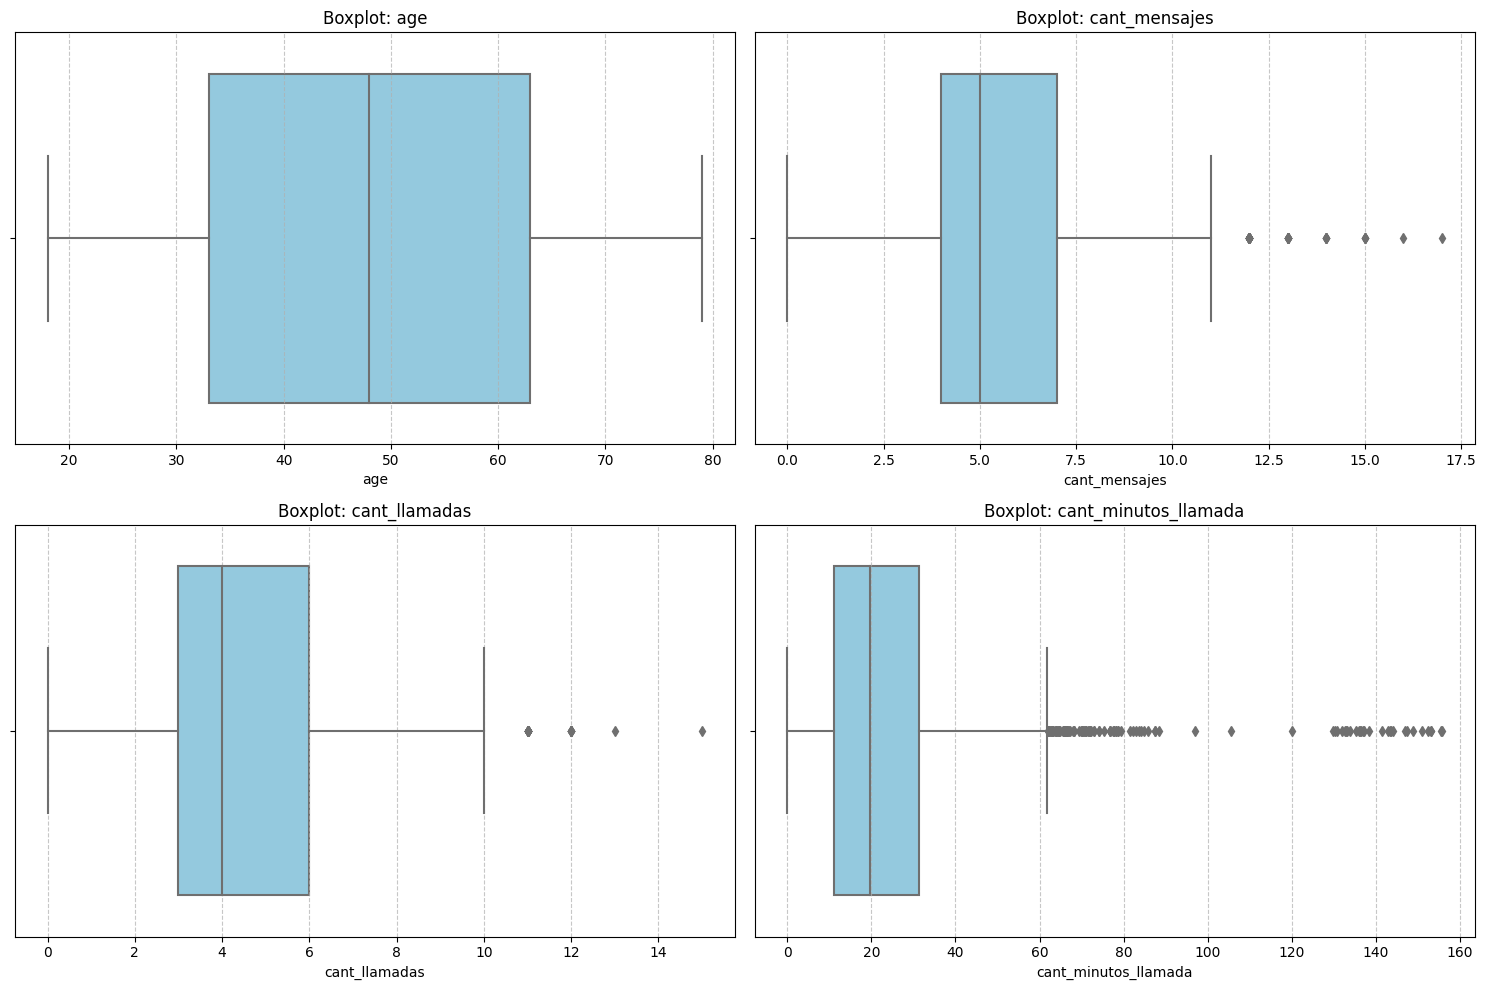

In [34]:
# Visualizando usando BoxPlot 
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columnas_numericas):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x= user_profile[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

💡Insights: 
-
 Age: No presenta outliers.
- cant_mensajes: Se observan outliers fuera del bigote superior en un valor aproximado de 12 a 17 mensajes.
- cant_llamadas: Se observan puntos fuera del bigote superior en un valor aproximado de 11 a 15 llamadas.
- cant_minutos_llamada: Se observan varios puntos fuera del bigote superior, llegando a valores cerca de 150 minutos.


In [35]:

# Calcular límites con el método IQR
columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

#calcular Q1
Q1 = user_profile[col].quantile(0.25)

#calcular Q3
Q3 = user_profile[col].quantile(0.75)

'Primer Cuartil', Q1, 'Tercer cuartil:', Q3

('Primer Cuartil', 11.12, 'Tercer cuartil:', 31.415)

In [36]:
# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()

,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,3999.000000,3999.000000,3999.000000,3999.000000
mean,48.138285,5.524381,4.478120,23.317054
std,17.691541,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000



💡Insights: 
- cant_mensajes: mantener o no outliers, porqué? Se deben mantener porque son comportamientos reales, no son errores, son usuarios más activos, no estan alejadas la media de la mediana por un rango elevado.

- cant_llamadas: mantener o no outliers, porqué? Se deben mantener, el número 15 de llamadas no es algo alejado de la realidad, es mayor la frecuencia, la media y la mediana se mantienen casi iguales.

- cant_minutos_llamada: mantener o no outliers, porqué? Se deben mantener, ya que se muestran a los clientes que son los más intensos, siendo unos posibles clientes empresariales o de uso intenso. Se pueden considerar como valiosos en el tema monetario, aunque la media está más alta que la mediana por 3.53 puntos, se puede demostrar que son clientes de uso elevado del servicio y se pueden considerar como un ingreso fuerte para la compañía.


---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [37]:
# Crear columna grupo_uso
def classify_segment(row):
    llamadas = row['cant_llamadas']
    mensajes = row['cant_mensajes']
    
    # Segmentación de Alto Valor 
    if llamadas < 5 and mensajes < 5:
        return "Bajo uso"
    # Segmentación de Valor Medio
    elif llamadas < 10 and mensajes < 10:
        return "Uso medio"
    # Segmentación de Valor Bajo
    else:
        return "Alto uso"

user_profile['grupo_uso'] = user_profile.apply(classify_segment, axis=1)

In [38]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio
1,10001,5,10,33.18,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [39]:
# Crear columna grupo_edad

def classify_segment(row):
    edad = row['age']
    
    # Segmentación de Alto Valor 
    if edad < 30:
        return "Joven"
    # Segmentación de Valor Medio
    elif edad < 60:
        return "Adulto"
    # Segmentación de Valor Bajo
    else:
        return "Adulto Mayor"

user_profile['grupo_edad'] = user_profile.apply(classify_segment, axis=1)


In [40]:
# verificar cambios
user_profile.head()

,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada,first_name,last_name,age,city,reg_date,plan,churn_date,grupo_uso,grupo_edad
0,10000,7,3,23.70,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,Uso medio,Adulto
1,10001,5,10,33.18,Mateo,Torres,53.0,NaN,2022-01-01 06:34:17.914478619,Basico,NaN,Alto uso,Adulto
2,10002,5,2,10.74,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,Uso medio,Adulto
3,10003,11,3,8.99,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,Alto uso,Adulto Mayor
4,10004,4,3,8.01,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

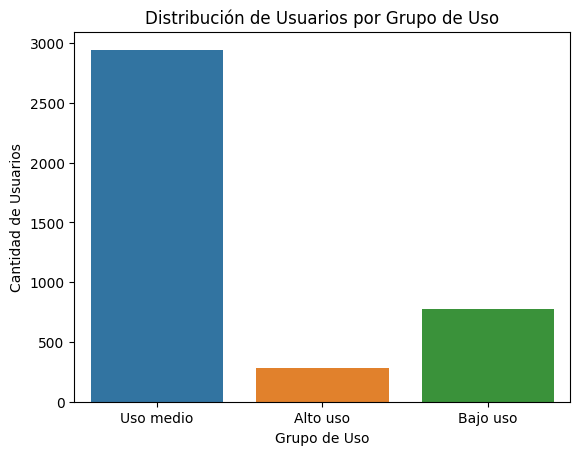

In [41]:
# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x='grupo_uso')
plt.title('Distribución de Usuarios por Grupo de Uso')
plt.xlabel('Grupo de Uso')
plt.ylabel('Cantidad de Usuarios')
plt.show()

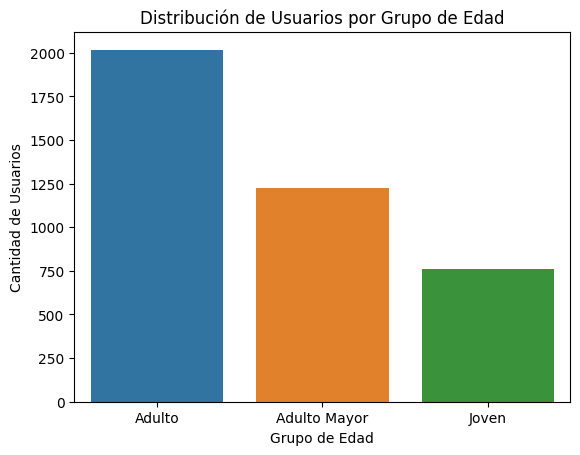

In [42]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x='grupo_edad')
plt.title('Distribución de Usuarios por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Usuarios')
plt.show()


---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:** 
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban? 
En el dataset de users: La columna de churn_date cuenta con el 88.35% de valores nulos, siendo una gran mayoría de las filas, no es considerado error, pero sí como clientes activos.
En la columna de city son el 11.72% esto afecta de alguna manera puede afectar en el nivel geográfico, aparte contaba con valores de '?'.

- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?
Los usuarios con mayor uso son los jóvenes de 19 a 30 años, que representan una frecuencia alta, tienen un flujo alto en llamadas y sms son los más rentables, pero también los más competitivos de ir con quien les ofrece algo más o mejor.


Los adultos en un rango de edad de 31 a 59 años representan un uso moderado en llamadas y sms, tienen un balance, generando menor volatilidad de churn. Siendo los más estables en ingresos económicos.

Los adultos mayores de 60 en adelante generan un bajo volumen de sms, siendo mayores las llamadas, el consumo mensual es bajo, así como la interacción con los servicios. Pudieran tener mayor incidencia en cancelaciones, son personas de riesgo, pero oportunas para el conocimiento de servicios digitales.

- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?
El segmento más valioso es el de los adultos de 31 a 59 años, ya que presenta estabilidad económica, tiene un consumo constante sin llegar a los extremos, tiene menor tasa de churn, así como son personas abiertas a mezclar las nuevas aplicaciones, como el consumo de llamadas y sms.

- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?
Patrones: Los eventos de uso extremo que están por encima del percentil 95, las duraciones acumuladas por encima del promedio, tienen un consumo concentrado, pero es de pocos usuarios.
Implicaciones: Este tipo de clientes puede ser clientes de alto valor, tiene un posible potencial a nivel corporativo, si se genera un plan de pago fijo, se puede perder el margen real.

En los usuarios de uso bajo corren el riesgo de cancelar el servicio, proveen bajos recursos y su inactividad puede ser larga.

- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

Crear planes para los usuarios clave, como: los de uso intensivo, con beneficiios por usar tanto los servicios de llamadas y de SMS, beneficios de apps, proporcionar un plan de fidelización por permanencia.

Crear un plan estable para el sector económicamente estable donde haya precios competitivos, beneficios familiares, algún incentivo por antigüedad.

Crear un plan flexible para el sector de bajo consumo, como: planes a bajo costo, pago por consumo, beneficios de una o dos apps de uso libre de datos.

✍️ **Escribe aquí tu análisis ejecutivo:**

### Análisis ejecutivo

⚠️ **Problemas detectados en los datos**
- Presencia de valores nulos como churn_date (88%), si no se hace un contexto adecuado, se pueden malinterpretar los datos y tomar una decisión errónea, en duration (55%) y length (45%) tienen un elevado número de valores faltantes, pero eran meramente de estructura, ya que dependen del tipo de evento. Finalmente, en City (12%) son datos erróneos, pudiendo afectar la segmentación regional.

- Valores inválidos '?' en city, es necesaria su estandarización antes de realizar un análisis, ya que puede haber un riesgo de distorsión por ubicación.

- Fechas inconsistentes
Hay fechas posteriores al periodo válido del dataset, se tiene un pequeño porcentaje de fechas faltantes, debido a un error de captura o de carga.


🔍 **Segmentos por Edad**
- Joven: Generan mayor uso, por lo tanto, generan alta frecuencia de eventos, interactúan más con el servicio, lo cual genera mayor tráfico, tienen mayor apertura a las promociones o a precios, pueden ser capaces de que se les retenga.
- Adultos: Generan un uso mediano pero constante de los servicios, tienen equilibrio en su consumo y mejor estabilidad en tiempos. Ellos generan ingresos recurrentes, menos riesgo de abandono y mayor visualización de su consumo.
- Adultos mayores: Tienen el menor volumen de uso, prefieren el uso funcional que constante, la interacción digital es muy baja casi nula. Puede generar baja contribución monetaria y con alto riesgo de abandono.


📊 **Segmentos por Nivel de Uso**
- Alto uso: Es decir que son de uso superior al promedio, una acumulación alta de llamadas, el consumo llega a ser frecuente y constante. Generan un ingreso bruto, se puede concentrar en su mayoría el tráfico total, son personas con mayor sensibilidad a beneficios y promociones altamente competitivas.

- Uso medio: Al ser de consumo regular y equilibrado, no generan picos extremos. Al ser el segmento más equilibrado y de mayor estabilidad económica, se les puede proporcionar algún programa de fidelidad o algún precio por paquete familiar o de amigos.

- Bajo uso: Tiene unos ingresos mensuales bajos, así como la duración acumulada, con inactividad intermitente. Esto es que la contribución de capital por medio de este sector será muy baja, cuenta con un alto riesgo de cancelación por falta de engagement y de que sea utilizado como algo secundario.


➡️ Esto sugiere que CobbectaTel debe tener una evolución, hacia su forma de segmentar, debe ser más inteligente y crear personalización, enfocándose en llevar al máximo el valor y la retención de los clientes más rentables o económicamente estables, mediante el uso de datos estratégicos.

💡 **Recomendaciones**
- Optimizar la segmentación comercial: Implementación de ofertas que diferencien el nivel de uso, así como, automatizar las recomendaciones basadas en su consumo real o necesidades.
- Generar protección al segmento más valioso: Generar incentivos de permanencia, beneficios de paquetes familiares o de amigos, mejorar su experiencia de permanencia.
- Monetizar de mejor manera a los usuarios intensivos: Generar planes premium con beneficios adicionales, tener políticas de uso justo para poder proteger el margen deseado, así como darles upgrades proactivos, para frenar la necesidad de buscar otro proveedor.
- Bajar el riesgo de churn en bajo uso: Generar planes económicos y flexibles, ofrecer campañas de reactivación y proporcionar incentivos por actividad mínima.
- Monitorear Outiliers: Para identificar los patrones de uso extremo en tiempo real, detectar posibles errores o abusos en el servicio, hacer ajustes en los planes según el comportamiento que genera alerta.